In [11]:
import json
import os
import sys

import geopandas as gpd
import shapely.geometry as geom

# Re-use some of the libraries that are used by app
sys.path.append('../apps/arcade-pipeline')
sys.path.append('../apps/arcade-pipeline/processors')

from processors.xarray_utils import XarrayUtils
from processors.metadata_utils import MetadataUtils
from stac_catalog_processor import STACCatalogProcessor, EngineRequest

## Set with your environment specific value

In [12]:
%env ISENGARD_PRODUCTION_ACCOUNT=false
%env AWS_ACCESS_KEY_ID=
%env AWS_SECRET_ACCESS_KEY=
%env AWS_SESSION_TOKEN=
%env OUTPUT_BUCKET=
%env EVENT_BUS_NAME=
%env ARCADE_STAC_SERVER_URL=
%env AWS_BATCH_JOB_ID=
%env INPUT_PREFIX=
%env INPUT_FILENAME=

env: ISENGARD_PRODUCTION_ACCOUNT=false
env: AWS_ACCESS_KEY_ID=
env: AWS_SECRET_ACCESS_KEY=
env: AWS_SESSION_TOKEN=
env: OUTPUT_BUCKET=
env: EVENT_BUS_NAME=
env: ARCADE_STAC_SERVER_URL=
env: AWS_BATCH_JOB_ID=
env: INPUT_PREFIX=
env: INPUT_FILENAME=


In [13]:
engine_input = {
	"id": "01hycfbar7jeq9r5cb85tfqhtf",
	"groupId": "01hycfb6z0jgkmb3hcm2sfpzvt",
	"name": "test-region-1",
	"totalArea": 247.7830501003104,
	"totalPolygons": 1,
	"processingConfig": {
		"mode": "scheduled",
		"scheduleExpression": "at(2024-05-21T10:24:13)",
		"scheduleExpressionTimezone": "Australia/Perth",
		"priority": "high"
	},
	"createdBy": "willsia@amazon.com",
	"createdAt": "2024-05-21T02:23:08.039Z",
	"boundingBox": [
		-104.4999483,
		39.9268103,
		-104.4895199,
		39.9390518
	],
	"attributes": {
		"attr2": "attr-two",
		"attr1": "attr-one"
	},
	"tags": {
		"arcade:results:createdAt": "2023-05-20T02:24:34.245Z",
		"arcade:results:id": "01hycfdszm9prvjktq1v472h0b",
		"arcade:results:message": "Essential container in task exited",
		"arcade:results:status": "succeeded",
		"arcade:results:updatedAt": "2023-05-21T02:25:51.139Z",
		"created-by-integration-test": "scheduler-module-resources",
		"tag2": "tag-two"
	},
	"updatedAt": "2024-05-21T02:25:51.448Z",
	"scheduleDateTime": "2024-05-21",
	"coordinates": [[[
		[
			-104.4895628,
			39.9390518
		],
		[
			-104.492009,
			39.938295
		],
		[
			-104.4926527,
			39.9376369
		],
		[
			-104.494026,
			39.9378015
		],
		[
			-104.4971159,
			39.9367485
		],
		[
			-104.4993046,
			39.9345767
		],
		[
			-104.4992188,
			39.9332933
		],
		[
			-104.4999483,
			39.931615
		],
		[
			-104.4996908,
			39.926909
		],
		[
			-104.4895199,
			39.9268103
		],
		[
			-104.4895628,
			39.9390518
		]
	]]],
	"polygonId": "01hycfbf8771g01c4vntn71ypj",
	"polygonName": "samplePolygon",
	"regionId": "01hycfbar7jeq9r5cb85tfqhtf",
	"regionName": "sampleRegion",
	"groupName": "sampleGroupName",
	"resultId": "01hyckbtdsqsxehgc8tcdm6jgg",
	"state": {
		"id": "01hycfbg2f3rdv67xpgrxh7q91",
		"polygonId": "01hycfbf8771g01c4vntn71ypj",
		"regionId": "01hycfbar7jeq9r5cb85tfqhtf",
		"groupId": "01hycfb6z0jgkmb3hcm2sfpzvt",
		"timestamp": "2024-05-21T02:23:01.295Z",
		"createdBy": "willsia@amazon.com",
		"createdAt": "2024-05-21T02:23:13.487Z",
		"attributes": {
			"estimatedYield": 1026
		},
		"tags": {
			"created-by-integration-test": "scheduler-module-resources",
			"crop": "wheat",
			"plantedAt": "2024-03-14T16:00:00.000Z"
		}
	},
	"outputPrefix": "region=01hycfbar7jeq9r5cb85tfqhtf/result=01hyckbtdsqsxehgc8tcdm6jgg/output/polygon=01hycfbf8771g01c4vntn71ypj"
}

## Load Stac Datasets

In [14]:
request = EngineRequest.from_dict(engine_input)
processor = STACCatalogProcessor(request)
stac_assets, previous_ndvi_raster = processor.load_stac_datasets()

bucket_name = os.getenv("OUTPUT_BUCKET")
temp_dir = "{}/{}".format(os.getcwd(), "output")

print(stac_assets)

Found: 2 items
<xarray.Dataset> Size: 114kB
Dimensions:      (time: 1, x: 91, y: 137)
Coordinates:
  * time         (time) datetime64[ns] 8B 2024-05-20T18:02:50.622000
  * x            (x) float64 728B 5.427e+05 5.427e+05 ... 5.436e+05 5.436e+05
  * y            (y) float64 1kB 4.421e+06 4.421e+06 ... 4.42e+06 4.42e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (time, y, x) uint16 25kB 2442 2526 2290 2106 ... 3690 3646 3514
    green        (time, y, x) uint16 25kB 2290 2262 2088 2010 ... 3088 3020 2922
    blue         (time, y, x) uint16 25kB 1872 1858 1710 1652 ... 2532 2498 2392
    nir08        (time, y, x) uint16 25kB 4618 4618 4546 4546 ... 4499 4499 4325
    scl          (time, y, x) uint8 12kB 5 5 4 4 4 4 5 5 5 ... 5 5 5 5 5 5 5 5 5


## Plot Region (Debugging)

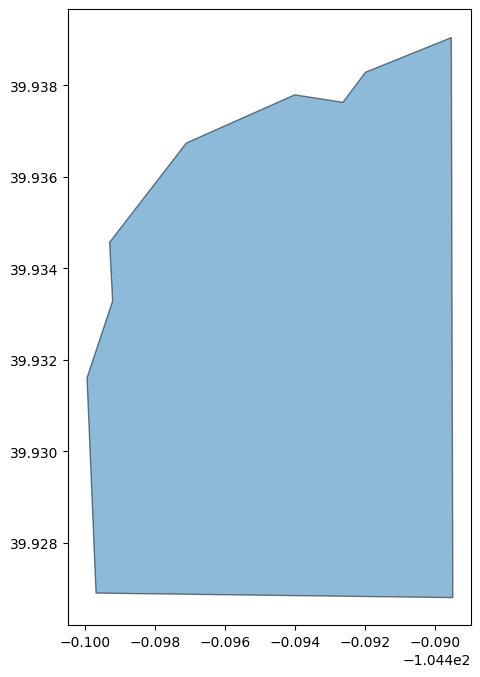

In [15]:
CRS = 'epsg:4326'
polygon_list = []
for coord in request.coordinates:
	for test in coord:
		polygon_list.append(geom.Polygon(test))
polygon_series = gpd.GeoSeries(polygon_list, crs='epsg:4326')
aoi = gpd.GeoDataFrame(geometry=polygon_series, crs=CRS)
aoi.plot(figsize=(10, 8), alpha=0.5, edgecolor='k')
bounding_box = polygon_series.total_bounds

## 1. Calculate cloud removal bands

In [16]:
# Perform cloud removal
stac_assets['scl_cloud_removed'] = XarrayUtils.remove_cloud(stac_assets[['scl']])
print(stac_assets)

<xarray.Dataset> Size: 127kB
Dimensions:            (time: 1, x: 91, y: 137)
Coordinates:
  * time               (time) datetime64[ns] 8B 2024-05-20T18:02:50.622000
  * x                  (x) float64 728B 5.427e+05 5.427e+05 ... 5.436e+05
  * y                  (y) float64 1kB 4.421e+06 4.421e+06 ... 4.42e+06 4.42e+06
    spatial_ref        int64 8B 0
    variable           <U3 12B 'scl'
Data variables:
    red                (time, y, x) uint16 25kB 2442 2526 2290 ... 3646 3514
    green              (time, y, x) uint16 25kB 2290 2262 2088 ... 3020 2922
    blue               (time, y, x) uint16 25kB 1872 1858 1710 ... 2498 2392
    nir08              (time, y, x) uint16 25kB 4618 4618 4546 ... 4499 4325
    scl                (time, y, x) uint8 12kB 5 5 4 4 4 4 5 5 ... 5 5 5 5 5 5 5
    scl_cloud_removed  (time, y, x) uint8 12kB 5 5 4 4 4 4 5 5 ... 5 5 5 5 5 5 5


### 1.a. Plot after cloud removal (debugging)

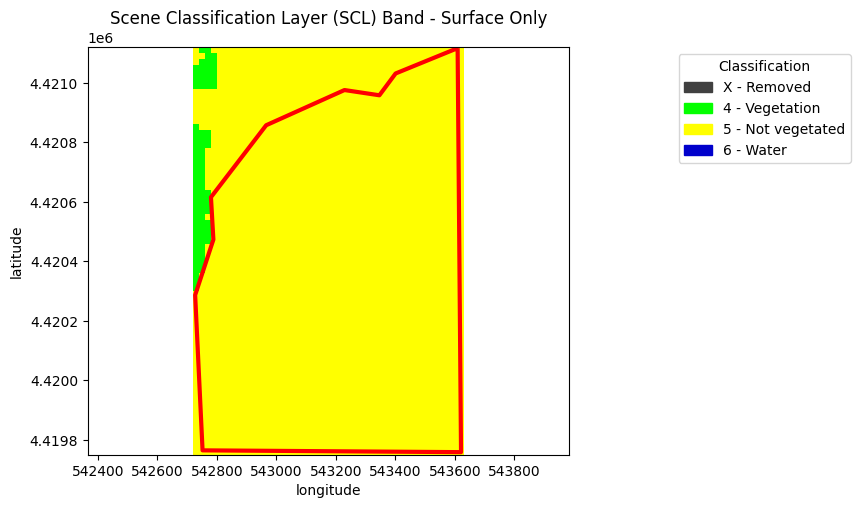

In [17]:
from pystac.extensions.projection import ProjectionExtension
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pyproj import CRS

sentinel_epsg = ProjectionExtension.ext(processor.stac_items[0]).epsg
output_crs = CRS.from_epsg(sentinel_epsg)

aoi_projected = aoi.to_crs(output_crs)

scl_color_def = [
	(0, '#000000', 'No data'),  # black
	(1, '#ff0000', 'Saturated or defective'),  # red
	(2, '#404040', 'Cast shadows'),  # gray
	(3, '#833c0b', 'Cloud shadows'),  # brown
	(4, '#04ff00', 'Vegetation'),  # green
	(5, '#ffff00', 'Not vegetated (bare soil)'),  # yellow
	(6, '#0000cc', 'Water'),  # blue
	(7, '#757171', 'Unclassified'),  # medium gray
	(8, '#aeaaaa', 'Cloud medium probability'),  # light gray
	(9, '#d0cece', 'cloud high probability'),  # very light gray
	(10, '#00ccff', 'Thin cirrus'),  # light blue/purple
	(11, '#ff66ff', 'Snow or ice'),  # cyan
]
scl_color_hex = [x[1] for x in scl_color_def]
_ = (
	# cloud_removed.isel(time=0)	# return new xarray.DataSet with each array index along the `time` dimension
	stac_assets[['scl_cloud_removed']]
	.isel(time=0)  # return new xarray.DataSet with each array index along the `time` dimension
	.to_array("band")  # convert to xarray.DataArray
	.plot.imshow(  # wraps matplotlib.pyplot.imshow()
		col="band",  # make column faceted plots on this dimension name
		size=5,  # height (in inches) of each plot.
		vmin=0,  # Lower value to anchor the colormap
		vmax=11,  # Upper value to anchor the colormap
		colors=scl_color_hex,
		levels=13,
		add_colorbar=False)
)

plt.title("Scene Classification Layer (SCL) Band - Surface Only")
plt.xlabel("longitude")
plt.ylabel("latitude")

ax = plt.gca()
ax.axis("equal")

# Create a legend object and add the patches to it
masked_color_def = [
	('X', '#404040', 'Removed'),
	(4, '#04ff00', 'Vegetation'),  # green
	(5, '#ffff00', 'Not vegetated'),  # yellow
	(6, '#0000cc', 'Water')  # blue
]
patches = []
for color in masked_color_def:
	patch = mpatches.Patch(color=color[1], label='{} - {}'.format(color[0], color[2]))
	patches.append(patch)
plt.legend(handles=patches, title='Classification', bbox_to_anchor=(1.6, 1))

# add the zone boundaries
_ = aoi_projected.plot(ax=ax, facecolor="none", edgecolor='red', lw=3)

## 2. Calculate ndvi raw

In [18]:
stac_assets['ndvi_raw'] = XarrayUtils.calculate_ndvi(stac_assets)
print(stac_assets[['ndvi_raw']])

<xarray.Dataset> Size: 102kB
Dimensions:      (time: 1, y: 137, x: 91)
Coordinates:
  * time         (time) datetime64[ns] 8B 2024-05-20T18:02:50.622000
  * x            (x) float64 728B 5.427e+05 5.427e+05 ... 5.436e+05 5.436e+05
  * y            (y) float64 1kB 4.421e+06 4.421e+06 ... 4.42e+06 4.42e+06
    spatial_ref  int64 8B 0
    variable     <U3 12B 'scl'
Data variables:
    ndvi_raw     (time, y, x) float64 100kB 0.3082 0.2928 0.33 ... 0.1047 0.1035


## 3. Fill cloud gap

In [21]:
stac_assets["ndvi"] = XarrayUtils.fill_cloud_gap(stac_assets["scl_cloud_removed"], stac_assets['ndvi_raw'], previous_ndvi_raster)
print(stac_assets[['ndvi']])

<xarray.Dataset> Size: 16kB
Dimensions:      (time: 1, y: 74, x: 26)
Coordinates:
  * time         (time) datetime64[ns] 8B 2023-06-13T16:34:43.264000
  * x            (x) float64 208B 5.365e+05 5.365e+05 ... 5.367e+05 5.367e+05
  * y            (y) float64 592B 3.585e+06 3.585e+06 ... 3.584e+06 3.584e+06
    spatial_ref  int64 8B 0
    variable     <U3 12B 'scl'
Data variables:
    ndvi         (time, y, x) float64 15kB nan 3.551 3.551 3.555 ... nan nan nan


## 4. Calculate ndvi change

In [22]:
if previous_ndvi_raster is not None:
	stac_assets['ndvi_change'] = XarrayUtils.calculate_ndvi_change(stac_assets['ndvi'], previous_ndvi_raster)
	print(stac_assets[['ndvi_change']])

## 5. Generate metadata

In [23]:
sentinel_link = []
for item in processor.stac_items:
	for link in item.links:
		if link.rel == 'self':
			sentinel_link.append({"rel": "derived_from", "href": link.href, "type": link.media_type})

# generate metadata.json
MetadataUtils.generate_metadata(sentinel_link, processor.bounding_box, stac_assets, temp_dir, bucket_name, request)

# upload assets to s3
MetadataUtils.upload_assets(bucket_name, request.output_prefix, temp_dir)

ParamValidationError: Parameter validation failed:
Invalid bucket name "": Bucket name must match the regex "^[a-zA-Z0-9.\-_]{1,255}$" or be an ARN matching the regex "^arn:(aws).*:(s3|s3-object-lambda):[a-z\-0-9]*:[0-9]{12}:accesspoint[/:][a-zA-Z0-9\-.]{1,63}$|^arn:(aws).*:s3-outposts:[a-z\-0-9]+:[0-9]{12}:outpost[/:][a-zA-Z0-9\-]{1,63}[/:]accesspoint[/:][a-zA-Z0-9\-]{1,63}$"

## 6. Publish finish event

In [ ]:
import boto3
from datetime import datetime

# Define the event details
event_bus_name = os.getenv("OUTPUT_BUCKET")
aws_batch_job_id = os.getenv("AWS_BATCH_JOB_ID")
eventbridge = boto3.client('events')
event = {
	'EventBusName': event_bus_name,
	'Source': 'com.aws.arcade.executor',
	'DetailType': 'com.aws.arcade.executor>PolygonMetadata>created',
	'Detail': json.dumps({
		"groupId": request.group_id,
		"polygonId": request.polygon_id,
		"regionId": request.region_id,
		"resultId": request.result_id,
		"jobId": aws_batch_job_id,
		"scheduleDateTime": request.schedule_date_time,
		"engineOutputLocation": f'{request.output_prefix}/metadata.json',
		"createdAt": datetime.now().isoformat()
	})}

# Publish the event to EventBridge
response = eventbridge.put_events(
	Entries=[
		{
			'Source': event['Source'],
			'DetailType': event['DetailType'],
			'Detail': event['Detail']
		}
	]
)

print(response)